# 1-Span Steel Data Exploration

In [1]:
%run initialize
%matplotlib inline

Python version: 3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
IPython version: 5.3.0
pandas version: 0.20.1 name: pd
NumPy version: 1.12.1 name: np
SciPy version: 0.19.0 name: sp
scikit-learn version: 0.18.1 name: skl
plotly version: 2.0.11 name: py
matplotlib version: 2.0.2 name: mpl


In [2]:
par1 = pd.read_pickle('./data/par1.pickle')
dem1 = pd.read_pickle('./data/dem1.pickle')
rtg1 = pd.read_pickle('./data/rtg1.pickle')
fields = pd.read_pickle('./data/fields.pickle')

## Strength I Flexure (+)

In [3]:
slg_int = [x[0] for x in rtg1['slg_st1_pos']]
slg_ext = [x[1] for x in rtg1['slg_st1_pos']]
fe_int = [x[0] for x in rtg1['fe_st1_pos']]
fe_ext = [x[1] for x in rtg1['fe_st1_pos']]

slg_rtgs = pd.DataFrame({'Interior': slg_int,'Exterior': slg_ext})
fe_rtgs = pd.DataFrame({'Interior': fe_int,'Exterior': fe_ext})

Compare interior and exterior girder ratings for SLG and FE.

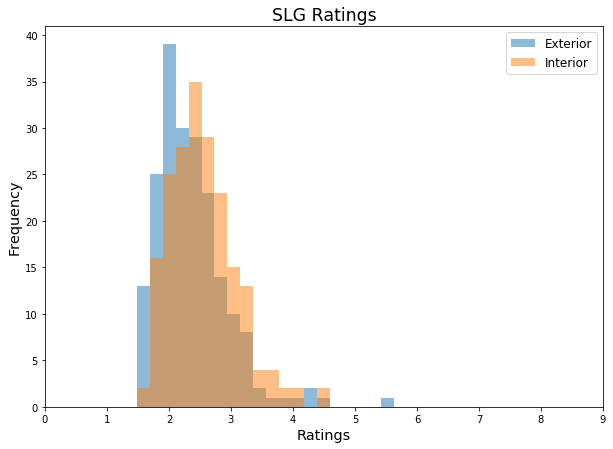

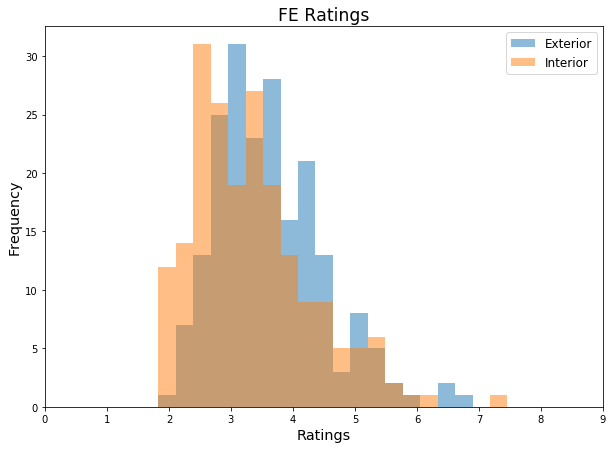

In [109]:
bins = 20
figsize = (10,7)

fig1 = mpl.pyplot.figure(figsize = figsize);
ax = fig1.gca();
slg_rtgs_hist = slg_rtgs.plot.hist(ax=ax,alpha=0.5, bins = bins);
slg_rtgs_hist.set_title('SLG Ratings', fontsize='xx-large');
slg_rtgs_hist.set_xlabel('Ratings', fontsize='x-large');
slg_rtgs_hist.set_ylabel('Frequency', fontsize='x-large');
slg_rtgs_hist.legend(loc=1, prop={'size': 12});
slg_rtgs_hist.set_xticks(range(0,10));


fig2 = mpl.pyplot.figure(figsize = figsize);
ax = fig2.gca();
fe_rtgs_hist = fe_rtgs.plot.hist(ax = ax,alpha=0.5, bins = bins);
fe_rtgs_hist.set_title('FE Ratings', fontsize='xx-large');
fe_rtgs_hist.set_xlabel('Ratings', fontsize='x-large');
fe_rtgs_hist.set_ylabel('Frequency', fontsize='x-large');
fe_rtgs_hist.legend(loc=1, prop={'size': 12});
fe_rtgs_hist.set_xticks(range(0,10));

A few initial conclusions:
* Appears that exterior may control for SLG while interior may control with FE
* There is a greater variance with FE ratings 
* Clearly FE ratings larger for some portion of the samples, indicating a possible bias  

Next, compare SLG to FE for interior and exterior girders.

In [110]:
int_rtgs = pd.DataFrame({'SLG': slg_int,'FE': fe_int})
ext_rtgs = pd.DataFrame({'SLG': slg_ext,'FE': fe_ext})

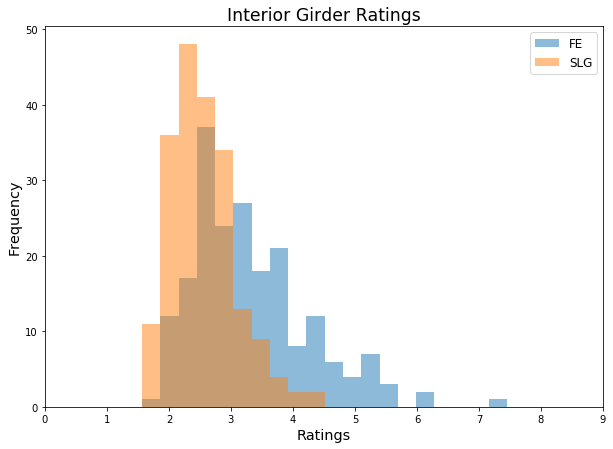

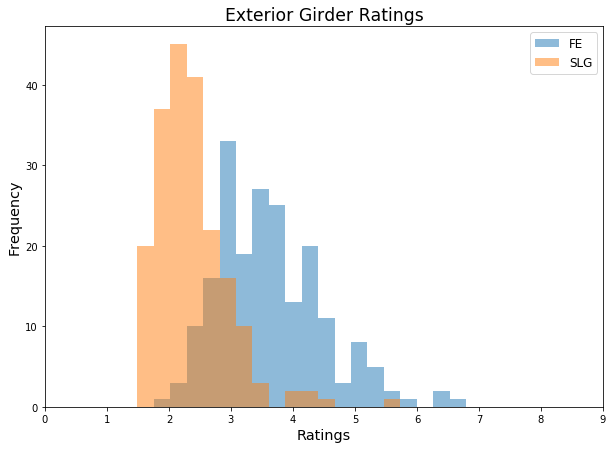

In [112]:
bins = 20
figsize = (10,7)

fig1 = mpl.pyplot.figure(figsize = figsize);
ax = fig1.gca();
int_rtgs_hist = int_rtgs.plot.hist(ax=ax,alpha=0.5, bins = bins);
int_rtgs_hist.set_title('Interior Girder Ratings', fontsize='xx-large');
int_rtgs_hist.set_xlabel('Ratings', fontsize='x-large');
int_rtgs_hist.set_ylabel('Frequency', fontsize='x-large');
int_rtgs_hist.legend(loc=1, prop={'size': 12});
int_rtgs_hist.set_xticks(range(0,10));


fig2 = mpl.pyplot.figure(figsize = figsize);
ax = fig2.gca();
ext_rtgs_hist = ext_rtgs.plot.hist(ax=ax,alpha=0.5, bins = bins);
ext_rtgs_hist.set_title('Exterior Girder Ratings', fontsize='xx-large');
ext_rtgs_hist.set_xlabel('Ratings', fontsize='x-large');
ext_rtgs_hist.set_ylabel('Frequency', fontsize='x-large');
ext_rtgs_hist.legend(loc=1, prop={'size': 12});
ext_rtgs_hist.set_xticks(range(0,10));

When comparing FE to SLG ratings for both interior and exterior girders, it becomes more clear that a bias exists with the SLG model. The FE ratings indicate that bridges may have greater reserve capacity than estimated by the SLG model. 

In [6]:
int_rtgs.describe()
ext_rtgs.describe()

,FE,SLG
count,200.000000,200.000000
mean,3.330660,2.558265
std,0.959716,0.532515
min,1.830000,1.566000
25%,2.592500,2.175500
50%,3.181500,2.482500
75%,3.825000,2.881750
max,7.460000,4.496000


,FE,SLG
count,200.000000,200.000000
mean,3.632455,2.367895
std,0.867218,0.587939
min,1.992000,1.491000
25%,2.977750,1.985000
50%,3.519000,2.283000
75%,4.157750,2.621750
max,6.793000,5.630000


We can better understand the bias in SLG design when we compare the ratios of FE to SLG ratings and demands as shown below. First we take a look at the ratio of FE to SLG ratings.

In [12]:
rtg_ratio = fe_rtgs/slg_rtgs
rtg_ratio.describe()

,Exterior,Interior
count,200.000000,200.000000
mean,1.554922,1.306348
std,0.265935,0.283668
min,0.767851,0.819990
25%,1.391323,1.092374
50%,1.505882,1.209936
75%,1.695975,1.511317
max,2.728549,2.339144


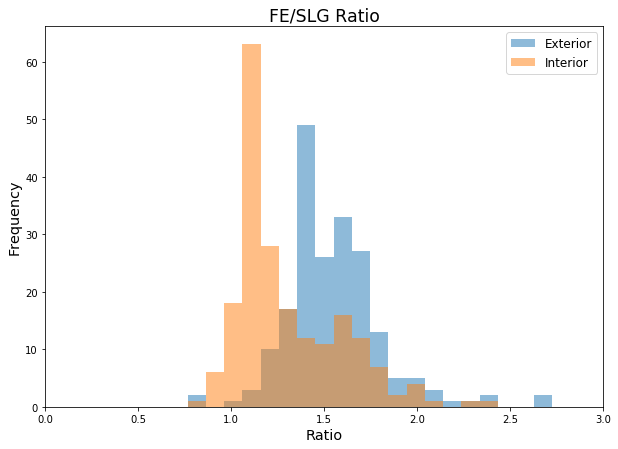

In [121]:
bins = 20
figsize = (10,7)

fig1 = mpl.pyplot.figure(figsize = figsize);
ax = fig1.gca();
rtg_ratio_hist = rtg_ratio.plot.hist(ax=ax,alpha=0.5, bins = bins);
rtg_ratio_hist.set_title('FE/SLG Ratio', fontsize='xx-large');
rtg_ratio_hist.set_xlabel('Ratio', fontsize='x-large');
rtg_ratio_hist.set_ylabel('Frequency', fontsize='x-large');
rtg_ratio_hist.legend(loc=1, prop={'size': 12});
rtg_ratio_hist.set_xticks(np.arange(0,3.5,0.5));

From the plot above showing the distribution of FE/SLG ratios for both interior and exterior girders, we form the following conjecture:
* Interior girders appear ot have less reserve capacity than exterior girders (this was also indicated in previous plots)
* At least 75% of the data shows there to be a bias (i.e. when FE/SLG ratio > 1)
* This conservatism may come from the design/capacity side (e.g. over-design/conservatism in the SLG distribution factors) or from some sort of bias in the estimation of demands.

To further invesitgate this phenomena, we'll next take a look at the ratio of FE to SLG demands.

Claims: 
* Initial dead load demands should be similar between FE and SLG (i.e. ratios around 1.0)
* Superimposed dead load demands should be greater for the exterior girders because of the load of the barriers
* Live load demands may exhibit bias if the live load distribution factors used in SLG design are in fact conservative.

In [59]:
## NOTE: THE FOLLOWING DEMANDS ARE THE MAXIMUM DEMANDS, 
## NOT THE ACTUAL DEMANDS AT THE LOCATION OF THE CONTROLLING RATING

# SLG initial dead load demands
slg_dl1m_int = [val[0] for val in dem1['slg_max_pos_dl1m']]
slg_dl1m_ext = [val[1] for val in dem1['slg_max_pos_dl1m']]
slg_dl1m = pd.DataFrame({'Interior': slg_dl1m_int, 'Exterior': slg_dl1m_ext})

# SLG superimposed dead load demands
slg_dl2m_int = [val[0] for val in dem1['slg_max_pos_dl2m']]
slg_dl2m_ext = [val[1] for val in dem1['slg_max_pos_dl2m']]
slg_dl2m = pd.DataFrame({'Interior': slg_dl2m_int, 'Exterior': slg_dl2m_ext})

# FE initial dead load demands
fe_dl1m_int = [max(val[1:-1]) for val in dem1['fe_max_pos_dl1m']]
fe_dl1m_ext = [max(val[0],val[-1]) for val in dem1['fe_max_pos_dl1m']]
fe_dl1m = pd.DataFrame({'Interior': fe_dl1m_int, 'Exterior': fe_dl1m_ext})

# FE superimposed dead load demands
fe_dl2m_int = [max(val[1:-1]) for val in dem1['fe_max_pos_dl2m']]
fe_dl2m_ext = [max(val[0],val[-1]) for val in dem1['fe_max_pos_dl2m']]
fe_dl2m = pd.DataFrame({'Interior': fe_dl2m_int, 'Exterior': fe_dl2m_ext})

# Ratios of FE to SLG dead load demands
dl1_ratio = fe_dl1m/slg_dl1m
dl2_ratio = fe_dl2m/slg_dl2m

dl1_ratio.describe()
dl2_ratio.describe()

,Exterior,Interior
count,200.000000,200.000000
mean,0.997032,0.975777
std,0.092594,0.071455
min,0.614592,0.543318
25%,0.957542,0.961801
50%,0.999730,0.982468
75%,1.047718,1.005855
max,1.301350,1.189320


,Exterior,Interior
count,200.000000,200.000000
mean,1.866158,1.267099
std,0.626751,0.326773
min,0.701497,0.538098
25%,1.387084,1.032760
50%,1.740079,1.188963
75%,2.254287,1.459778
max,4.641862,2.226562


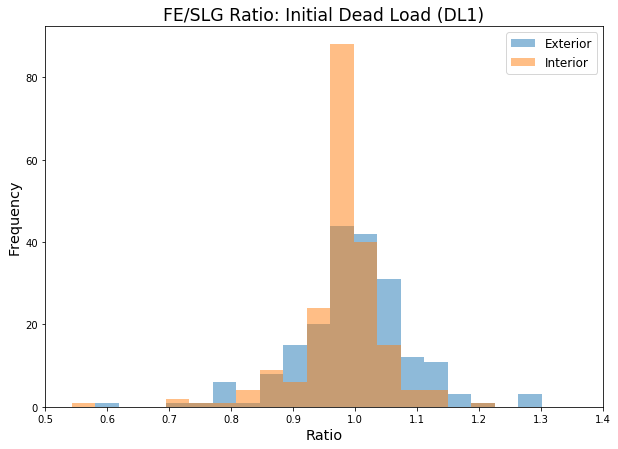

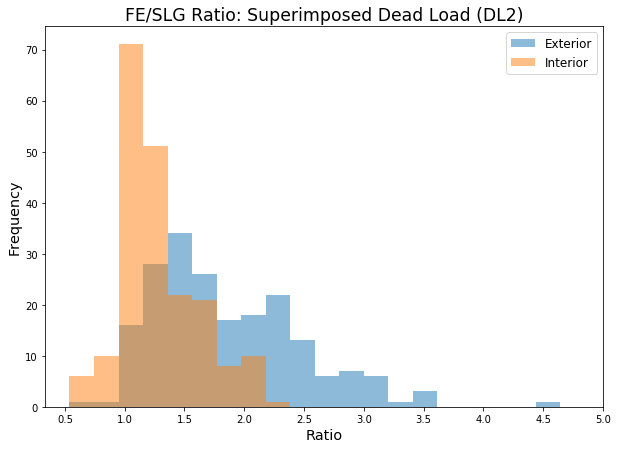

In [129]:
bins = 20
figsize = (10,7)

fig1 = mpl.pyplot.figure(figsize = figsize);
ax = fig1.gca();
dl1_ratio_hist = dl1_ratio.plot.hist(ax=ax,alpha=0.5, bins = bins);
dl1_ratio_hist.set_title('FE/SLG Ratio: Initial Dead Load (DL1)', fontsize='xx-large');
dl1_ratio_hist.set_xlabel('Ratio', fontsize='x-large');
dl1_ratio_hist.set_ylabel('Frequency', fontsize='x-large');
dl1_ratio_hist.legend(loc=1, prop={'size': 12});
dl1_ratio_hist.set_xticks(np.arange(0.5,1.5,0.1));

fig2 = mpl.pyplot.figure(figsize = figsize);
ax = fig2.gca();
dl2_ratio_hist = dl2_ratio.plot.hist(ax=ax,alpha=0.5, bins = bins);
dl2_ratio_hist.set_title('FE/SLG Ratio: Superimposed Dead Load (DL2)', fontsize='xx-large');
dl2_ratio_hist.set_xlabel('Ratio', fontsize='x-large');
dl2_ratio_hist.set_ylabel('Frequency', fontsize='x-large');
dl2_ratio_hist.legend(loc=1, prop={'size': 12});
dl2_ratio_hist.set_xticks(np.arange(0.5,5.5,0.5));

Conjecture:
* The ratios for initial dead load are approximately 1.0, indicating the estimation of dead load in SLG design may be accurate. The variance observed in the plot above may come from several factors that affect the load distribution (e.g. skew, diaphragm stiffness).
* As expected the exterior girders generally have higher superimposed dead load demand which may be due to the fact that they are taking the entire weight of the barriers rather than sharing the load with all other girders as in the SLG design 